In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.3 MB/s 


In [2]:
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap

In [3]:
import pandas as pd
from keras.datasets import imdb

In [4]:
corpus,y = shap.datasets.imdb()
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train).toarray() # sparse also works but Explanation slicing is not yet supported
X_test = vectorizer.transform(corpus_test).toarray()

In [8]:
corpus_train[20]

'Well how was I suppose to know this was "the" dumb ass promotional "Lordi Motion Picture"? I mean, I realized this when that "dinosaur" costume showed up and by the time the lead singer made his appearance I was humming "Hard Rock Hallelujah" to myself... even though I hate that song. "Dark Floors" is about a young autistic girl who is in the process of being sneaked out of the hospital by her over protective father when they, and the rest of the people in that particular elevator, become momentarily trapped... When they arrive at their floor it comes as quite a surprise to find that there is nobody else around. The hospital is empty... Except for a variety of monsters that seem to be stalking them for no apparent reason... They run through the hallways and stairwells, encountering all of the band members of the heavy metal band in their outlandish, shock-rock costumes... Nothing really memorable here, except the lousy acting, lack of gore/nudity, and the utterly shameless promotional

In [9]:
y

array([False, False, False, ...,  True,  True,  True])

In [10]:
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [11]:
explainer = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names())
shap_values = explainer(X_test)

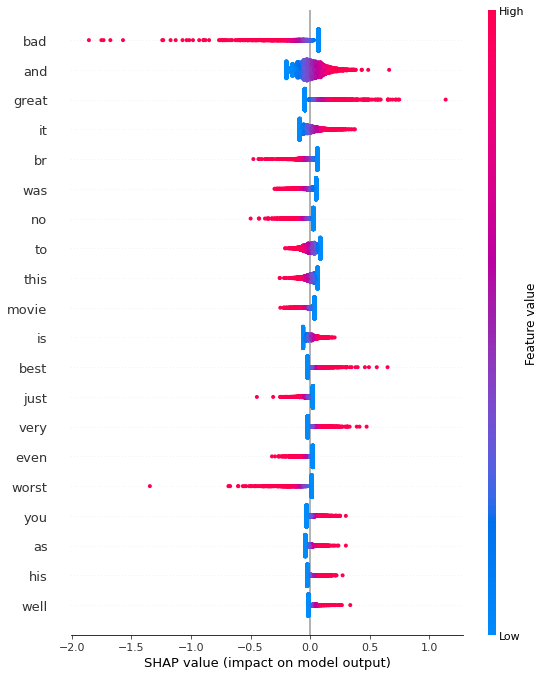

In [12]:
shap.summary_plot(shap_values, X_test)

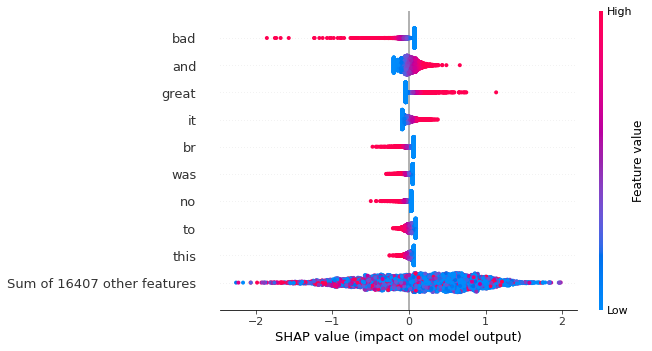

In [13]:
shap.plots.beeswarm(shap_values)

In [16]:
names = vectorizer.get_feature_names()
names[200:240]

['73',
 '74',
 '747',
 '75',
 '76',
 '77',
 '78',
 '79',
 '7th',
 '80',
 '80s',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '8mm',
 '8th',
 '90',
 '90210',
 '90s',
 '91',
 '911',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '9th',
 'aag',
 'aames',
 'aaron',
 'abandon',
 'abandoned']

In [17]:
pd.DataFrame(X_train,columns=names)

,00,000,007,01,02,05,06,10,100,1000,...,zombi,zombie,zombies,zone,zoo,zoom,zooms,zorro,zu,zucker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078969,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
ind = 0
shap.plots.force(shap_values[ind])

In [19]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Positive Review:
"Twelve Monkeys" is odd and disturbing, yet being so clever and intelligent at the same time. It cleverly jumps between future and the past, and the story it tells is about a man named James Cole, a convict, who is sent back to the past to gather information about a man-made virus that wiped out 5 billion of the human population on the planet back in 1996. At first Cole is sent back to the year 1990 by accident and by misfortune he is taken to a mental institution where he tries to explain his purpose and where he meets a psychiatrist Dr. Kathryn Railly who tries to help him and a patient named Jeffrey Goines, the insane son of a famous scientist. Being provocative and somehow so sensible, dealing with and between reason and madness, the movie is a definite masterpiece in the history of science-fiction films.<br /><br />The story is just fantastic. It's so original and so entertaining. The screenplay itself written by David and Janet Peoples is inspired by a movie name

In [20]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.1 MB/s 
     |████████████████████████████████| 133 kB 52.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=1e500c285524fa3f0b8693ed24dc817d1e3db965c81afdac00587fb64cb6b986
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [21]:
import eli5
eli5.show_weights(model, top=10) #this result is not meaningful, as weight and feature names are not there

In [22]:
eli5.show_weights(model,feature_names=vectorizer.get_feature_names(),target_names=['Negative','Positive']) 
#make sense

In [26]:
eli5.show_prediction(model, corpus_train[3], vec=vectorizer,
                     target_names=['Nagative','Positive']) # explain local prediction

In [27]:
eli5.show_prediction(model, corpus_train[4], vec=vectorizer,
                     target_names=['Nagative','Positive']) # explain local prediction

In [29]:
eli5.show_prediction(model, corpus_train[101], vec=vectorizer,
                     target_names=['Nagative','Positive']) # explain local prediction

In [ ]:
# the BIAS is the intercept term from the model

In [ ]:
# the above approach uses a bag of words vectorizer and a linear classifier

In [ ]:
# for other classifiers the feature selection could be harder

In [ ]:
# Improvement in Modeling pipeline to make more sense out of text classification